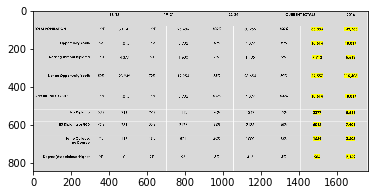

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
image = mpimg.imread("../../../Visualizations/chart_4.png",)
plt.imshow(image)
plt.show()

In [22]:
plt.savefig("../../../Visualizations/chart_3.png")

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.image as mpimg
image = mpimg.imread("../../Visualizations/chart_4.png", b)
plt.imshow(image)
plt.show()

NameError: name 'b' is not defined

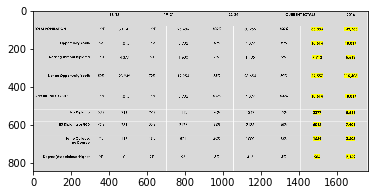

In [34]:
plt.imshow(image)
plt.show()

In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [16]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
DBNAME = "opportunity_youth"

In [18]:
conn = psycopg2.connect(dbname=DBNAME)

In [19]:
report_2016 = pd.DataFrame({'16 to 18': [1610, 985, 179, 31, 2805], 
                            '19 to 21': [2048, 3349, 1666, 221, 7284],
                            '22 to 24': [1981, 3067, 1763, 1917, 8728],
                            'total': [5639, 7401, 3608, 2169, 18817]}, 
                            index = ['No Diploma', 'HS Diploma or GED',
                            'Some College No Degree', 
                            'Associate or Higher Degree', 'OY'])

report_2016

,16 to 18,19 to 21,22 to 24,total
No Diploma,1610,2048,1981,5639
HS Diploma or GED,985,3349,3067,7401
Some College No Degree,179,1666,1763,3608
Associate or Higher Degree,31,221,1917,2169
OY,2805,7284,8728,18817


In [20]:
report_current = pd.DataFrame({'16 to 18': [916, 781, 118, 0, 1815 ], 
                               '19 to 21': [1112, 2176, 521, 93, 3902 ],
                               '22 to 24': [1349, 2135, 1000, 413, 4897],
                               'total': [3377, 5092, 1639, 506, 10614]}, 
                               index = ['No Diploma', 'HS Diploma or GED',
                               'Some College No Degree', 
                               'Associate or Higher Degree', 'OY'])
report_current

,16 to 18,19 to 21,22 to 24,total
No Diploma,916,1112,1349,3377
HS Diploma or GED,781,2176,2135,5092
Some College No Degree,118,521,1000,1639
Associate or Higher Degree,0,93,413,506
OY,1815,3902,4897,10614


In [21]:
combined = report_2016.join(report_current, rsuffix='_new')
combined.drop('OY', axis=0, inplace=True)

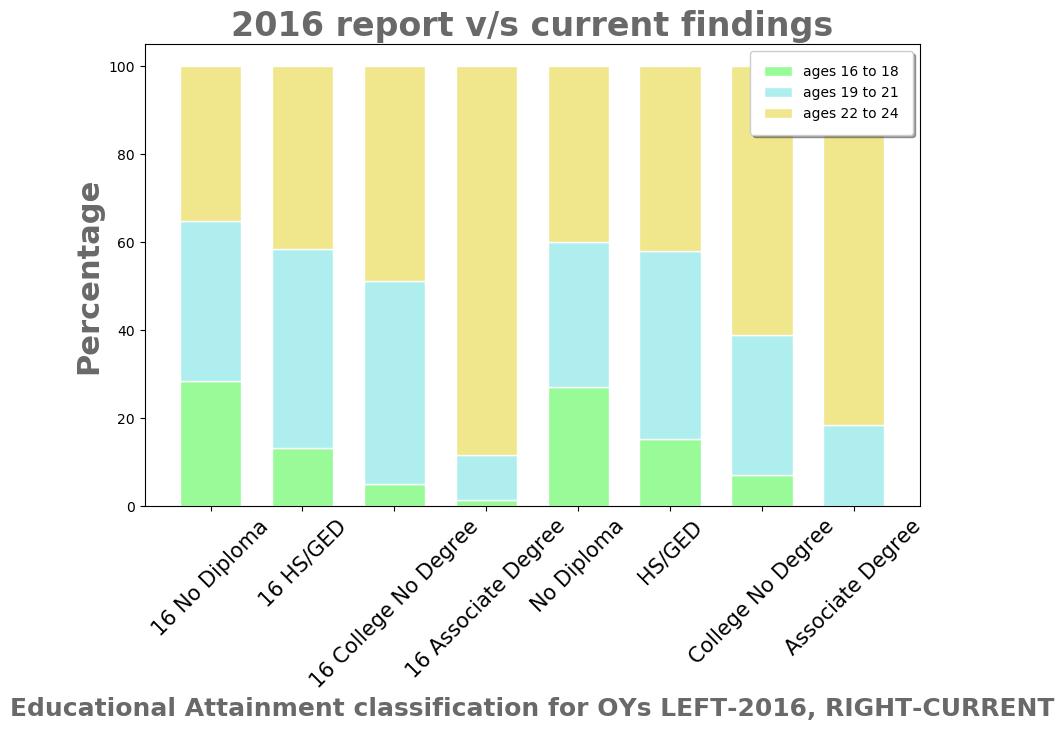

<Figure size 640x480 with 0 Axes>

In [23]:
plt.style.use(['default'])
f,ax = plt.subplots(1, figsize=(10,6))
bar_with = 1
bar_l = [i for i in range(8)]
tick_pos = [i+(bar_with/2) for i in bar_l]
oy_16_pct = [i/j * 100 for i,j in zip(combined['16 to 18'], combined['total'])]
oy_19_pct = [i/j * 100 for i,j in zip(combined['19 to 21'], combined['total'])]
oy_22_pct = [i/j * 100 for i,j in zip(combined['22 to 24'], combined['total'])]
oy_16_pct2 = [i/j * 100 for i,j in zip(combined['16 to 18_new'], combined['total_new'])]
oy_19_pct2 = [i/j * 100 for i,j in zip(combined['19 to 21_new'], combined['total_new'])]
oy_22_pct2 = [i/j * 100 for i,j in zip(combined['22 to 24_new'], combined['total_new'])]
ax.bar(bar_l, oy_16_pct+oy_16_pct2, label='ages 16 to 18', 
       color='palegreen', width=bar_with/1.5, edgecolor='white')
ax.bar(bar_l, oy_19_pct+oy_19_pct2, bottom=oy_16_pct+oy_16_pct2, label='ages 19 to 21',
       color='paleturquoise', width=bar_with/1.5, edgecolor='white')
ax.bar(bar_l, oy_22_pct+oy_22_pct2, bottom=[i+j for i,j in zip(oy_16_pct+oy_16_pct2, oy_19_pct+oy_19_pct2)], 
       label='ages 22 to 24',
       color='khaki', width=bar_with/1.5, edgecolor='white')
ax.set_xticklabels(['No Diploma', '16 No Diploma', '16 HS/GED', '16 College No Degree', '16 Associate Degree', 'No Diploma', 
                    'HS/GED', 'College No Degree', 'Associate Degree'], rotation=45, fontsize=15)
ax.set_ylabel('Percentage', fontsize= 22, fontweight='bold', color='dimgrey')
ax.set_xlabel("Educational Attainment classification for OYs LEFT-2016, RIGHT-CURRENT", fontsize= 18, fontweight='bold', color='dimgrey')
ax.set_title("2016 report v/s current findings",
             fontsize=24, fontweight='bold', color='dimgrey')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
plt.savefig('oy_credentials1.png', bbox = 'tight');

### Can't figure out how to get this to show up on the notebook